## Hate Speech Detection in Memes Using Text Data


### Authors

- Sai Shishir Ailneni
- Priyaanka Reddy Boothkuri
- Manogna Tummanepally

## Introduction

This notebook outlines the steps taken to build a machine learning model that detects hate speech in text data. The model processes text through various stages of cleaning, vectorization, and transformation before being used to train a neural network. We utilize techniques like lemmatization, TF-IDF vectorization, and dimensionality reduction via Truncated SVD, followed by a feedforward neural network for classification.

## Import Required Libraries

Here, we import all necessary libraries that will be used throughout the notebook.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score,roc_auc_score,roc_curve

np.random.seed(9012023)

## Data Loading and Preprocessing

Load the dataset and perform initial preprocessing which includes selecting relevant columns.


In [2]:
data = pd.read_json('./data/train.jsonl', lines=True)

In [3]:
data

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [4]:
df = data[['label', 'text']]

In [5]:
df.head()

,label,text
0,0,its their character not their color that matters
1,0,don't be afraid to love again everyone is not ...
2,0,putting bows on your pet
3,0,i love everything and everybody! except for sq...
4,0,"everybody loves chocolate chip cookies, even h..."


## Train-Test Split

Split the data into training and testing sets.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

## Text Preprocessing

Defining a function for lemmatization and applying it to the train and test datasets.

In [7]:
wnl = WordNetLemmatizer()

In [8]:
def lemmatize_tweet_text(text):
    lemmatized_text = ""
    for word, tag in pos_tag(word_tokenize(text)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = wnl.lemmatize(word, wntag)
        lemmatized_text += lemma + " "
    return lemmatized_text.strip()

In [9]:
X_train = X_train.apply(lemmatize_tweet_text)

In [10]:
X_test = X_test.apply(lemmatize_tweet_text)

## Feature Extraction with TF-IDF

Vectorize the text data using TF-IDF and apply dimensionality reduction.

In [11]:
tfidf_vect = TfidfVectorizer(stop_words='english', lowercase=True, token_pattern="[^\W\d_]+")

X_train = tfidf_vect.fit_transform(X_train)

In [12]:
X_test = tfidf_vect.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((6800, 6215), (1700, 6215))

In [14]:
df_X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_vect.get_feature_names_out())
df_X_train.head()

,aaa,aaaaaaaaaaaaaah,aaaand,abandon,abba,abc,abduction,abdul,abide,ability,...,zealander,zimbabwe,zionist,zionists,zola,zombie,zone,zoo,zoroastrain,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_X_test = pd.DataFrame(X_train.toarray(), columns=tfidf_vect.get_feature_names_out())
df_X_test.head()

,aaa,aaaaaaaaaaaaaah,aaaand,abandon,abba,abc,abduction,abdul,abide,ability,...,zealander,zimbabwe,zionist,zionists,zola,zombie,zone,zoo,zoroastrain,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
svd = TruncatedSVD(n_components=150, n_iter=10) #n_components is the number of topics, which should be less than the number of features

X_train= svd.fit_transform(X_train)
X_test = svd.transform(X_test)

In [17]:
X_train.shape, X_test.shape

((6800, 150), (1700, 150))

## Neural Network Model Building

Construct and compile a feedforward neural network for classification.

In [18]:
# Step 6: Build Feedforward Neural Network Model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

Train the model and plot the training and validation accuracy and loss.

In [19]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5754 - loss: 0.6801 - val_accuracy: 0.6235 - val_loss: 0.6559
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6550 - loss: 0.6345 - val_accuracy: 0.6272 - val_loss: 0.6393
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6638 - loss: 0.6142 - val_accuracy: 0.6522 - val_loss: 0.6278
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6917 - loss: 0.5891 - val_accuracy: 0.6610 - val_loss: 0.6273
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6994 - loss: 0.5890 - val_accuracy: 0.6603 - val_loss: 0.6284
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.5815 - val_accuracy: 0.6603 - val_loss: 0.6276
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7080 - loss: 0.5707 - val_accuracy: 0.6588 - val_loss: 0.6298
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7172 - loss: 0.5639 - val_accuracy: 0.6588 - val_loss

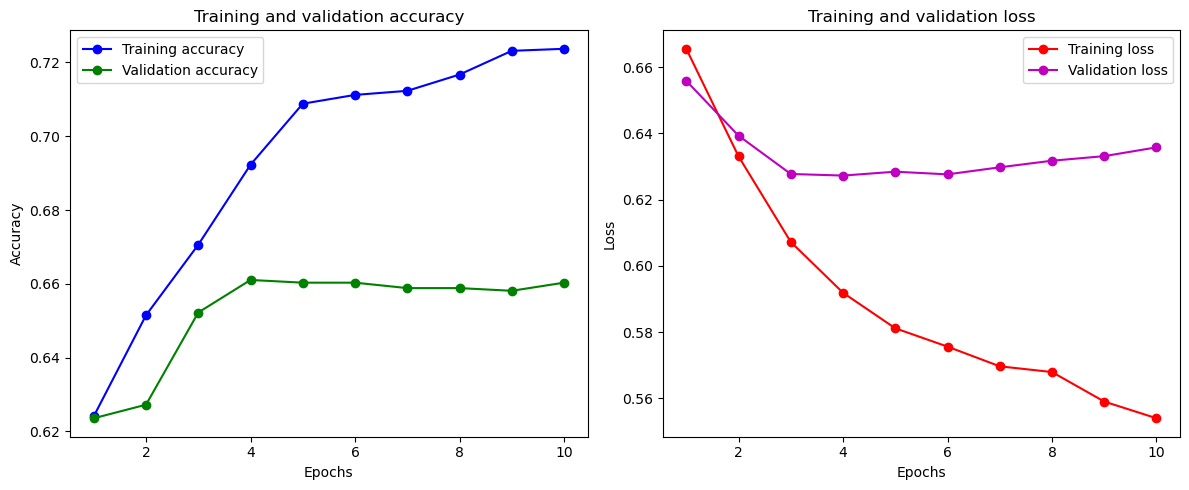

In [22]:
# Extracting the data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'mo-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

Evaluate the model on the test dataset and print out the key metrics.

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.5937
Test Accuracy: 0.6970587968826294


In [21]:
y_pred_proba = model.predict(X_test)

y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Area Under Curve:", AUC)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
conf_matrix

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.6970588235294117
Precision: 0.6598837209302325
Recall: 0.3632
F1 Score: 0.46852425180598556
Area Under Curve: 0.6271813953488372
Confusion Matrix:


array([[958, 117],
       [398, 227]], dtype=int64)

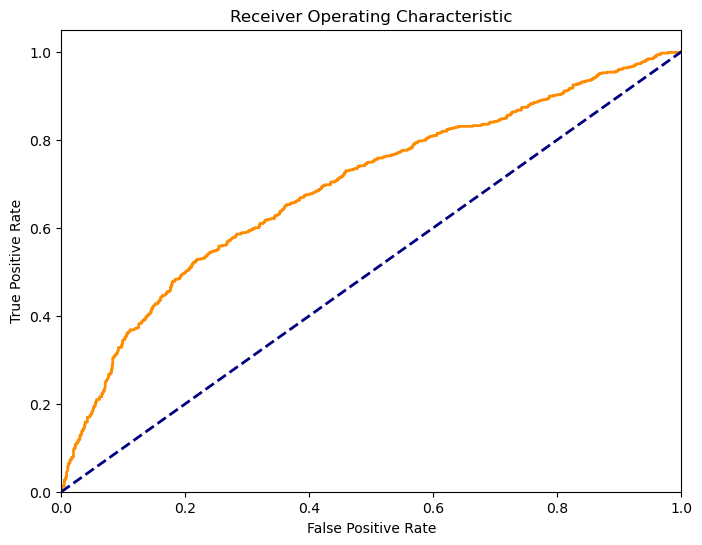

In [29]:
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.show()

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_pred_proba)

## Conclusion and Analysis

### Model Performance Overview

After training our text-based hate speech detection model for 10 epochs, we achieved a test accuracy of 69.71%. While the model shows a decent overall accuracy, the precision, recall, and F1 score values indicate room for significant improvement. Specifically, the precision was moderately high at 65.98%, suggesting that when the model predicts hate speech, it is relatively reliable. However, the recall at 36.32% was quite low, indicating that many instances of actual hate speech were missed by the model.

The Area Under Curve (AUC) of 62.72% further points to moderate performance in distinguishing between the classes under various threshold settings.

### Detailed Analysis of Performance

- **False Negatives and Recall:** The substantial number of false negatives (398 out of 625 actual positive cases) severely affected the recall. This might be attributed to the model's inability to capture more subtle and complex instances of hate speech, which are often context-dependent and may not be flagged by simpler text analysis methods like TF-IDF and SVD. 

- **Conservatism in Prediction:** The model's conservative prediction strategy, reflected in its higher precision but lower recall, suggests that it was more tuned to avoid false positives at the cost of missing true positives. This can often occur in scenarios where the negative class dominates or the model's thresholding for class prediction is skewed towards one class.

- **Training Dynamics:** The training process showed an improvement in accuracy over epochs, but the validation accuracy plateaued and the validation loss slightly increased after the initial epochs. This could hint at the model starting to overfit the training data as it continued to learn. While not drastic, this trend suggests the training could have been stopped earlier to prevent potential overfitting.

### Insights into Model Limitations and Data Characteristics

- **Model Complexity and Data Features:** The relatively simple architecture of a feedforward neural network with shallow text preprocessing might not be sufficient to grasp the nuanced linguistic patterns of hate speech fully. The model's architecture, combined with the basic nature of TF-IDF for vectorization and SVD for dimension reduction, might oversimplify the text features, stripping away useful contextual cues needed for accurate hate speech detection.

- **Imbalance in Data Handling:** The model was trained on a dataset that wasn't balanced, which can predispose the model towards the majority class, leading to poorer performance on the minority class (hate speech instances). This imbalance can exacerbate the challenges in training effective hate speech detection models, as it might not expose the model sufficiently to the more complex, less frequent examples of hate speech.

### Recommendations for Future Improvements

- **Enhanced Text Processing:** To better capture linguistic nuances, consider employing advanced NLP techniques like word embeddings (Word2Vec, GloVe) or contextual embeddings from models like BERT or GPT. These models are better suited for understanding context and the complexities of language used in hate speech.

- **Model Architectural Enhancements:** Experiment with more complex architectures such as Convolutional Neural Networks (CNNs) for text, or Recurrent Neural Networks (RNNs), particularly LSTMs or GRUs, which are effective at capturing sequences and can better handle the temporal dependencies in text data.

- **Dynamic Threshold Adjustment:** Implement techniques for dynamic threshold adjustment during classification to better balance the trade-off between precision and recall, possibly using methods like precision-recall curves to find an optimal threshold for the classification task.

These insights and recommendations aim to guide further refinements, making the model more robust and sensitive to the subtleties of hate speech detection in textual content.
